In [1]:
# Tamás Molnár
# SP - Data Processing @ UvA
# Final Project
# finalProject.ipynb

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.plotting import figure
from bokeh.palettes import Category20b_20
from bokeh.io import output_notebook, show
from bokeh.models import ColumnDataSource, CategoricalColorMapper, HoverTool


from myTools import scrapeBreakingBadRatings, scrapeHomelandRatings, scrapeMovieLengths
from myTools import readNetflixDataset, episodePerDay, titlePerGenre, titleType 
from myTools import watchingHabit, mostWatchedGenre, busiestDay, mostWatchedType, heatMapBreakingBad, heatMapHomeland

output_notebook()

Loading BokehJS ...

In [3]:
netflixRaw = readNetflixDataset('datasets/NetflixViewingHistory.xlsx')
#display(netflixRaw)
netflix = netflixRaw.copy()
netflix['Date'] = pd.to_datetime(netflix['Date'])
display(netflix)

,Original Title,Date,Genre,Series / Movie,Title,Season,Episode title,Episode second title
0,Dark: Season 3: The Origin,2021-04-29,Drama,Series,Dark,Season 3,The Origin,None
1,Dark: Season 3: Adam and Eva,2021-04-28,Drama,Series,Dark,Season 3,Adam and Eva,None
2,Dark: Season 3: The Survivors,2021-04-28,Drama,Series,Dark,Season 3,The Survivors,None
3,Dark: Season 3: Deja-vu,2021-04-26,Drama,Series,Dark,Season 3,Deja-vu,None
4,Dark: Season 2: Endings and Beginnings,2021-04-26,Drama,Series,Dark,Season 2,Endings and Beginnings,None
...,...,...,...,...,...,...,...,...
1375,The End of the F***ing World: Season 1: Episode 5,2019-01-11,Comedy,Series,The End of the F***ing World,Season 1,Episode 5,None
1376,The End of the F***ing World: Season 1: Episode 4,2019-01-11,Comedy,Series,The End of the F***ing World,Season 1,Episode 4,None
1377,The End of the F***ing World: Season 1: Episode 3,2019-01-11,Comedy,Series,The End of the F***ing World,Season 1,Episode 3,None
1378,The End of the F***ing World: Season 1: Episode 2,2019-01-11,Comedy,Series,The End of the F***ing World,Season 1,Episode 2,None


In [4]:
netflixDailyCounts = episodePerDay(netflix)
netflixGenreCount = titlePerGenre(netflix)
netflixTypeCount = titleType(netflix)
#display(netflixDailyCounts, netflixGenreCount, netflixTypeCount) - Necessary to display?

In [5]:
watchingHabit(netflix)
# More interactivness -> Select titles, select genres. Maybe splitted into multiple graphs.

In [6]:
busiestDay(netflixRaw)

In [7]:
mostWatchedGenre(netflix)

In [8]:
mostWatchedType(netflix)

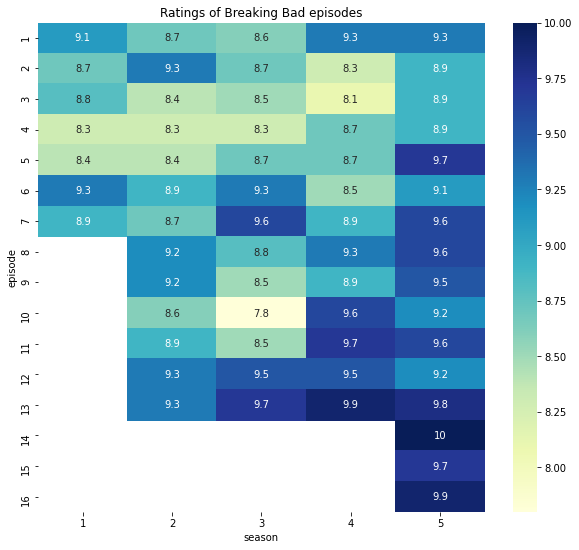

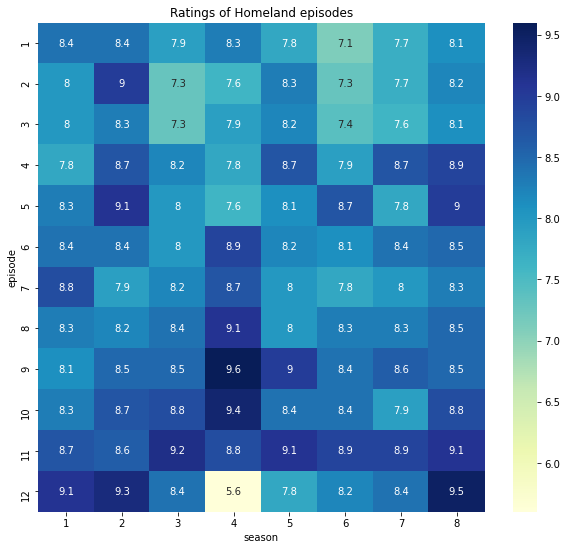

In [9]:
# Maybe make the scraping script more general and have an argument for the series itself, so ppl can scrape any series' ratings.

heatMapBreakingBad()
heatMapHomeland()

In [10]:
# Just testing

netflix_films = netflix.loc[netflix['Series / Movie'] == 'Movie']

netflix['Length'] = ""

netflix.loc[netflix['Genre'] != 'Sitcom', 'Length'] = 50
netflix.loc[netflix['Genre'] != 'Animation', 'Length'] = 50

netflix.loc[netflix['Genre'] == 'Sitcom', 'Length'] = 22
netflix.loc[netflix['Genre'] == 'Animation', 'Length'] = 22
netflix.loc[netflix['Title'] == 'The End of the F***ing World', 'Length' ] = 22



#display(netflix)

#display(netflix_films)

In [27]:
# also testing

onlyMovies = netflix.loc[netflix['Series / Movie'] == 'Movie']

#display(onlyMovies)

dfMovieLengths = scrapeMovieLengths()

onlyMovies.index = dfMovieLengths.index

dfMovieLengths['Original Title'] = onlyMovies[['Original Title']].copy()

#display(dfMovieLengths)

netflix['runtime'] = ""


ValueError: Must have equal len keys and value when setting with an iterable

In [12]:
# Heat map version of busiestDay() ! 

In [13]:
# Try to create a similiar graph like the watchingHabit(), but y-axis is the spent minutes.